In [1]:
import numpy as np
import pandas as pd

from scipy.io import readsav

import matplotlib.pyplot as plt
import matplotlib.dates as date
from datetime import datetime
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cmasher as cmr

In [2]:
import scienceplots
plt.rcParams.update({'font.size': 16})
plt.style.use(['bright'])
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Avenir']

Import Si IV data

In [3]:
fn = 'siiv_windat_f1.sav'
ro = readsav(fn, verbose=False, python_dict=False)

dat = ro.d['INT'][0]
wvl = ro.d['WVL'][0]
err = ro.d['ERR'][0]
arcsec = ro.d['SOLAR_Y'][0]

# seconds array
t_iris =  ro.d['time'][0]

# datetime obj for plotting
time_iris = ro.d['time_ccsds'][0]
    
tm_iris = pd.to_datetime([t.decode("utf-8") for t in time_iris])
tm_iris = date.date2num(tm_iris)

In [4]:
# wavelength reductions
siiv_lab = 1402.77
siiv_cen = siiv_lab

x1,x2 = 1402.25,1404.25 
wvl_lim, = np.where((wvl >= x1) & (wvl <= x2))
lam = wvl[wvl_lim]
siiv = dat[:,:,wvl_lim]
siiv_err = err[:,:,wvl_lim]

dlam=np.unique(np.diff(lam))[0]
print('dlam: ',dlam)

dlam:  0.02543999999738844


In [5]:
m = -0.021
b = 41

x_coords = np.arange(siiv.shape[1])
y_coords = m * x_coords + b
y_coords = np.clip(y_coords, 0, siiv.shape[0] - 1).astype(int)

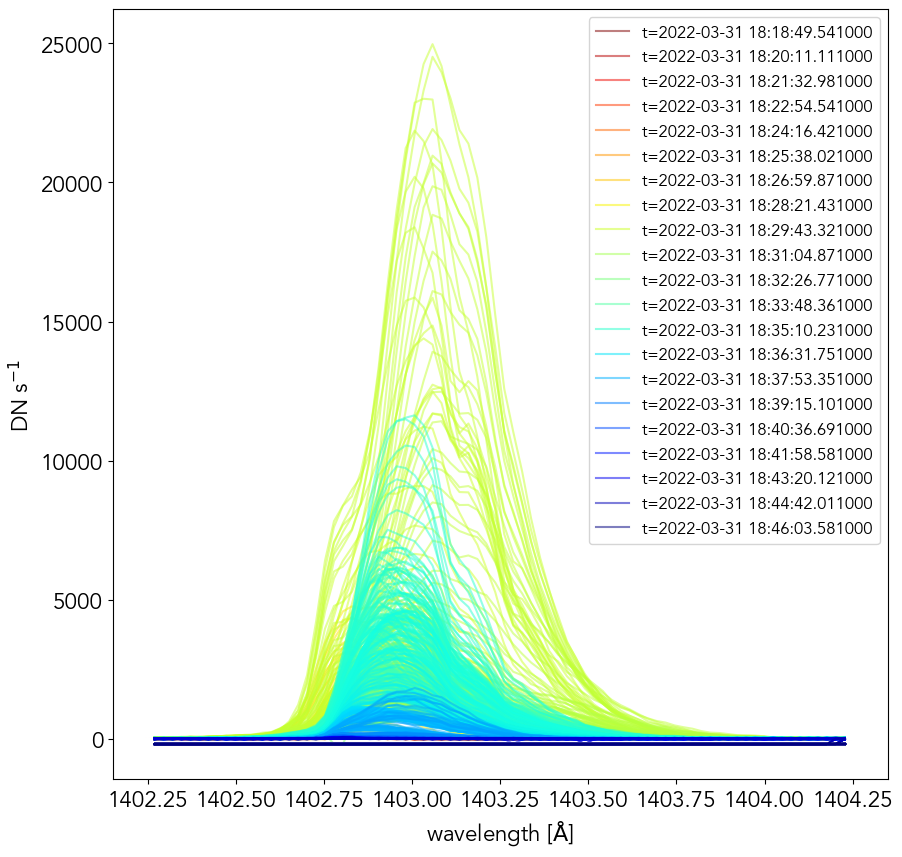

In [6]:
tms = np.arange(0,2001)
ns = len(tms)
colors = plt.cm.jet_r(np.linspace(0, 1, ns))


fig, ax = plt.subplots(figsize=(10,10))   
for i,t in enumerate(tms):
    
    tstr = 't='+str(datetime.strptime(time_iris[t].decode("utf-8"), '%Y-%m-%dT%H:%M:%S.%f'))
    
    if i%100==0:
        ax.plot(lam,siiv[y_coords[i],t],label=tstr,color=colors[i],alpha=0.5)
    else:
        ax.plot(lam,siiv[y_coords[i],t],color=colors[i],alpha=0.5)
    
ax.legend(loc=0,fontsize=12)
ax.set_xlim(1402.15,1404.35)

ax.set_ylabel(r'DN s$^{-1}$')
ax.set_xlabel(r'wavelength [$\mathrm{\AA}$]')

#cbar.ax.tick_params(colors='white')
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
ax.tick_params(axis='x')
ax.tick_params(axis='y')

In [7]:
from fit_multi import gaussian, fit6, plot_fit_results

b'2022-03-31T18:29:58.871'


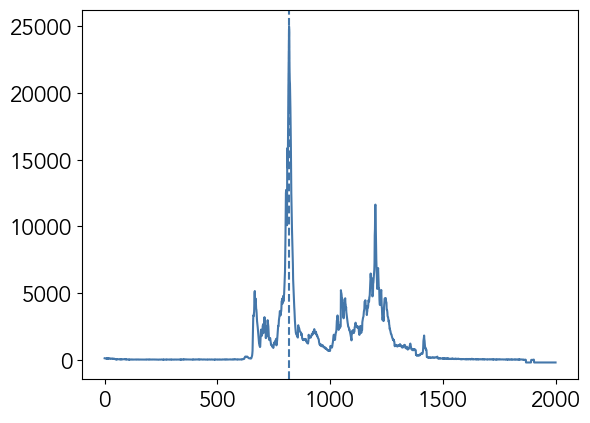

In [8]:
siiv_max = np.max(siiv, axis=2)
peak_slice = siiv_max[y_coords,x_coords]
plt.plot(peak_slice)

tm = 819
plt.axvline(tm,linestyle='dashed')
print(time_iris[tm])

In [9]:
result = fit6(tm, y_coords[tm], lam, siiv, siiv_err)
fit_res = result.best_values
spec = siiv[y_coords[tm], tm]

Removed Gaussian 5 due to overlap with Gaussian 6 (centers: 1402.8700, 1402.7700)
Removed Gaussian 5 due to overlap with Gaussian 6 (centers: 1402.8700, 1402.7700)
Removed Gaussian 5 due to overlap with Gaussian 6 (centers: 1402.8700, 1402.7700)
Removed Gaussian 5 due to overlap with Gaussian 6 (centers: 1402.8700, 1402.7700)
Removed Gaussian 5 due to overlap with Gaussian 6 (centers: 1402.8700, 1402.7700)
Removed Gaussian 5 due to overlap with Gaussian 6 (centers: 1402.8700, 1402.7700)
Removed Gaussian 5 due to overlap with Gaussian 6 (centers: 1402.8700, 1402.7700)
Removed Gaussian 5 due to overlap with Gaussian 6 (centers: 1402.8700, 1402.7700)
Best combination: [1, 2, 3, 4, 6]


Gaussians used in best fit: [1, 2, 3, 4, 6]


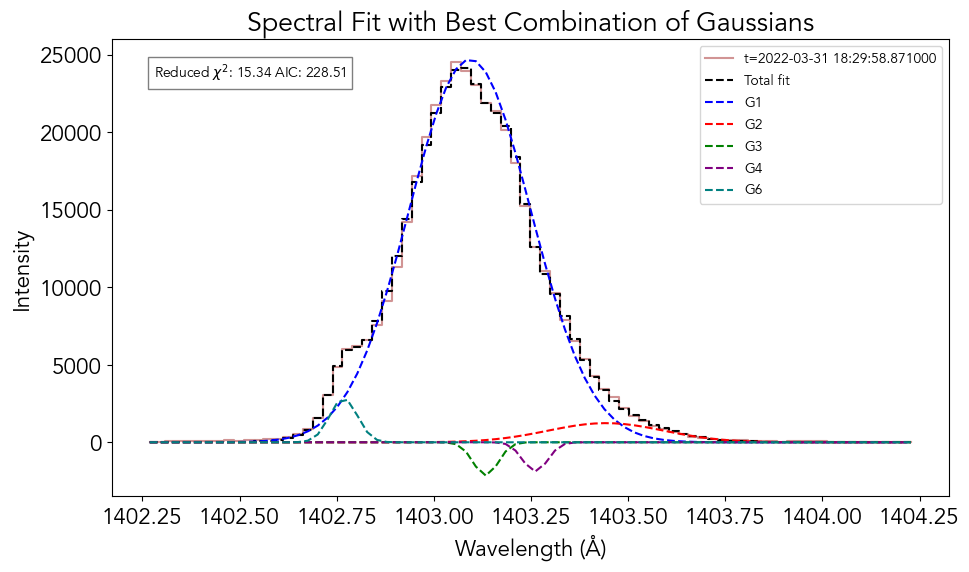

In [10]:
fig, ax = plot_fit_results(tm, y_coords[tm], lam, siiv, time_iris, result)
plt.show()